# 이원 반복측정 분산분석

구형성과 등분산 검정 못함.
- correction = False로 두고 함.

그래프 그려줘야 됨

## 설정

### 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [6]:
df = pd.read_csv('./data/10_1.TWMA.csv', encoding = 'cp949')
df.head()

,id,실험그룹,시점,통증1,통증2,통증3
0,1,1,1,12.32,12.32,12.32
1,2,1,1,57.16,57.16,57.16
2,3,1,1,12.32,12.32,12.32
3,4,1,1,16.62,16.62,16.62
4,5,1,1,18.63,18.63,18.63


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      254 non-null    int64  
 1   실험그룹    254 non-null    int64  
 2   시점      254 non-null    int64  
 3   통증1     254 non-null    float64
 4   통증2     254 non-null    float64
 5   통증3     254 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 12.0 KB


In [8]:
# 범주형 변수 처리

df['실험그룹'].replace({1:'대조군', 2:'실험군'}, inplace = True)
df['실험그룹'] = df['실험그룹'].astype('category')

df['시점'].replace({1:'사전', 2:'사후'}, inplace = True)
df['시점'] = df['시점'].astype('category')

df.head()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_15156\229054773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['실험그룹'].replace({1:'대조군', 2:'실험군'}, inplace = True)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_15156\229054773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

,id,실험그룹,시점,통증1,통증2,통증3
0,1,대조군,사전,12.32,12.32,12.32
1,2,대조군,사전,57.16,57.16,57.16
2,3,대조군,사전,12.32,12.32,12.32
3,4,대조군,사전,16.62,16.62,16.62
4,5,대조군,사전,18.63,18.63,18.63


In [10]:
df.groupby(['실험그룹', '시점'])['통증1'].describe().round(3)

C:\Users\SikBread\AppData\Local\Temp\ipykernel_15156\1952821629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['실험그룹', '시점'])['통증1'].describe().round(3)


count    mean     std    min    25%    50%     75%    max
실험그룹 시점                                                           
대조군  사전   58.0  41.914  14.640  12.32  33.54  41.39  49.933  73.05
     사후   58.0  41.458   9.496  21.54  36.22  42.07  49.260  57.53
실험군  사전   69.0  41.639  16.141   5.08  31.22  42.45  51.150  72.57
     사후   69.0  32.782  10.085  10.80  25.42  32.62  38.820  54.58

In [ ]:
df.columns

Index(['온도', '방법', '맛점수1', '맛점수2', '맛점수3'], dtype='object')

In [ ]:
# 분석 변수가 여러 개일 때

num_feature = ['온도', '방법', '맛점수1', '맛점수2', '맛점수3']

for num in num_feature:
    print("---", num, "---")
    results = df.groupby('온도')[num].describe().round(3)
    print(results, "\n")

--- 온도 ---
     count unique   top freq
온도                          
200도    29      1  200도   29
300도    31      1  300도   31 

--- 방법 ---
     count unique top freq
온도                        
200도    29      2  기름   15
300도    31      2  오븐   16 

--- 맛점수1 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  90.862  3.935  84.0  88.0  91.0  94.0  98.0
300도   31.0  90.226  4.477  84.0  86.0  91.0  94.0  98.0 

--- 맛점수2 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  88.897  3.559  84.0  86.0  88.0  92.0  96.0
300도   31.0  91.032  4.012  82.0  88.0  91.0  94.0  98.0 

--- 맛점수3 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  86.724  1.791  84.0  85.0  87.0  88.0  91.0
300도   31.0  94.097  2.135  90.0  92.5  94.0  95.5  98.0 



C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('온도')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('온도')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

## 4.1 상호작용 있을 때

In [11]:
# 상호작용 있을 때
# ss_type = 3

pg.mixed_anova(dv = '통증1',
               between = '실험그룹',
               within = '시점',
               subject = 'id',
               correction= False,
               data = df).round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,실험그룹,1262.254,1,125,1262.254,4.666,0.033,0.036,NaN
1,시점,1600.527,1,125,1600.527,24.479,0.000,0.164,1.0
2,Interaction,1112.226,1,125,1112.226,17.011,0.000,0.120,NaN


In [12]:
# 시점이 2개일 때는 구형성 검증 없음



In [ ]:
# post-hoc : 상호작용 있을 때

pg.pairwise_tests(dv = '통증1',
                  between = '실험그룹', 
                  within='시점',
                  subject='id',
                  data = df).round(3)

,Contrast,시점,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,시점,-,사전,사후,True,True,4.660,126.000,two-sided,0.000,1811.627,0.377
1,실험그룹,-,대조군,실험군,False,True,2.205,124.470,two-sided,0.029,1.685,0.382
2,시점 * 실험그룹,사전,대조군,실험군,False,True,0.100,124.254,two-sided,0.920,0.191,0.018
3,시점 * 실험그룹,사후,대조군,실험군,False,True,4.985,123.368,two-sided,0.000,7393.895,0.878


In [ ]:
# post-hoc : 상호작용 있을 때
# within_first = False 표시를 바꿀 수 있
pg.pairwise_tests(dv = '통증1',
                  between = '실험그룹', 
                  within='시점',
                  within_first = False,
                  subject='id',
                  data = df).round(3)

,Contrast,실험그룹,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,실험그룹,-,대조군,실험군,False,True,2.205,124.47,two-sided,0.029,1.685,0.382
1,시점,-,사전,사후,True,True,4.660,126.00,two-sided,0.000,1811.627,0.377
2,실험그룹 * 시점,대조군,사전,사후,True,True,0.243,57.00,two-sided,0.809,0.148,0.037
3,실험그룹 * 시점,실험군,사전,사후,True,True,8.849,68.00,two-sided,0.000,1.277e+10,0.654


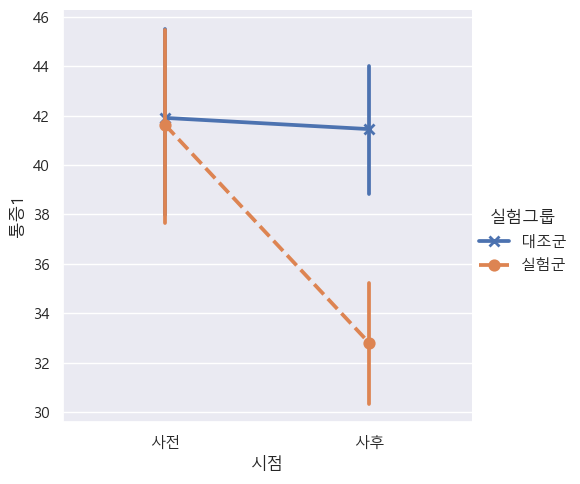

In [ ]:
# 그래프

sns.catplot(x = '시점',
            y = '통증1',
            hue = '실험그룹',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

## 4.2 상호작용효과 없을 때, 그룹, 시점 모두 의미가 없을 때

In [16]:
pg.mixed_anova(dv = '통증2',
               between = '실험그룹',
               within = '시점',
               subject = 'id',
               correction= False,
               data = df).round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,실험그룹,14.237,1,125,14.237,0.053,0.819,0.000,NaN
1,시점,177.948,1,125,177.948,2.722,0.102,0.021,1.0
2,Interaction,2.544,1,125,2.544,0.039,0.844,0.000,NaN


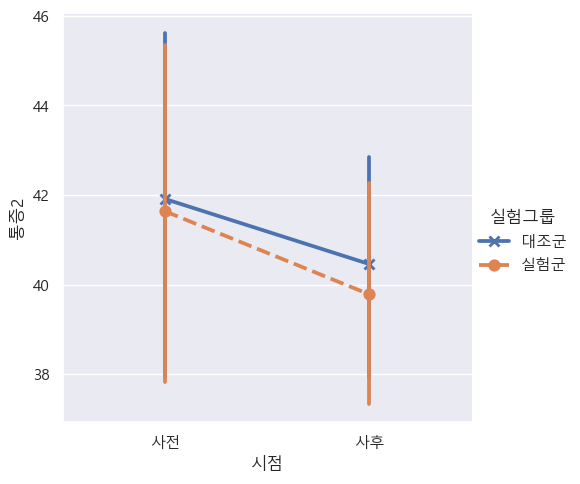

In [23]:
# 그래프

sns.catplot(x = '시점',
            y = '통증2',
            hue = '실험그룹',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

여기서 종료. 의미 없음

## 4.3 상호작용 효과 없는데 시점이 효과가 있을 때

In [17]:
pg.mixed_anova(dv = '통증3',
               between = '실험그룹',
               within = '시점',
               subject = 'id',
               correction= False,
               data = df).round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,실험그룹,0.038,1,125,0.038,0.000,0.991,0.000,NaN
1,시점,1083.485,1,125,1083.485,16.571,0.000,0.117,1.0
2,Interaction,5.637,1,125,5.637,0.086,0.770,0.001,NaN


등분선, 구형성 못함. 시점이 두 개라. 바로 사후분석

In [20]:
# post-hoc : 상호작용 없을 때

pg.pairwise_tests(dv = '통증3',
                  between = '실험그룹', 
                  within='시점',
                  interaction=False,
                  subject='id',
                  data = df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,시점,사전,사후,True,True,4.086,126.00,two-sided,0.00,213.155,0.319
1,실험그룹,대조군,실험군,False,True,-0.012,124.47,two-sided,0.99,0.19,-0.002


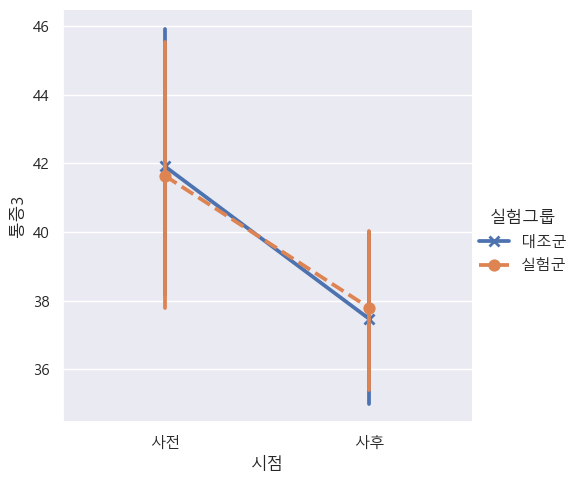

In [22]:
# 그래프

sns.catplot(x = '시점',
            y = '통증3',
            hue = '실험그룹',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

플라시보 효과. 아로마 효과가 없구나.